In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

data_income = pd.read_csv('../datasets/income.csv')
data = data_income.copy()

## EDA
1. Getting to know the data
2. Data Preprocessing
3. Cross tables and data visualization

In [69]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [70]:
# Checking for missing values
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [71]:
# Summary of numerical vairables
data.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [72]:
# Summary of categorical variables
summary_categorical = data.describe(include='O')
print(summary_categorical)

         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  


In [73]:
# Frequency of each category
data['JobType'].value_counts()

JobType
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
?                    1809
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [74]:
data['occupation'].value_counts()

occupation
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
?                    1816
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: count, dtype: int64

In [75]:
## Checking for unique classes
print(np.unique(data['JobType']))   
print(np.unique(data['occupation']))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [76]:
# There are ' ?' instead of NaN
data = pd.read_csv('../datasets/income.csv',na_values=[' ?'])

## Data Preprocessing

In [77]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [78]:
missing = data[data.isnull().any(axis=1)] # axis = 1 => to consider atleast one column value is missing
missing

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


### Points to Note
1. Missing values in Jobtype = 1809
2. Missing values in Occupation = 1816
3. There are 1809 rows where two specific columns i.e. occupation and Jobtype have missing values
4. (1816-1809) = 7 => You still have occupation unfilled for these 7 rows. Because, jobtype is never worked.

In [79]:
data2 = data.dropna(axis=0)

In [80]:
# Relationship between independent variables
# correlation = data2.corr()
# BEGIN: Handle non-numeric data for correlation calculation
data2_numeric = data2.select_dtypes(include=[np.number])
correlation = data2_numeric.corr()
correlation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


### Correlation Result Analysis
None of the variables are correlated with each other.

### Cross tables and Data Visualization

In [81]:
# Extracting the column names
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [82]:
# Gender proportion table
gender = pd.crosstab(index=data2["gender"], columns='count', normalize=True)
print(gender)

col_0      count
gender          
Female  0.324315
Male    0.675685


In [83]:
# Gender vs Salary
gender_salstat = pd.crosstab(index=data2["gender"], columns=data2["SalStat"], margins=True, normalize='index')
print(gender_salstat)

SalStat  greater than 50,000  less than or equal to 50,000
gender                                                    
 Female             0.113678                      0.886322
 Male               0.313837                      0.686163
All                 0.248922                      0.751078


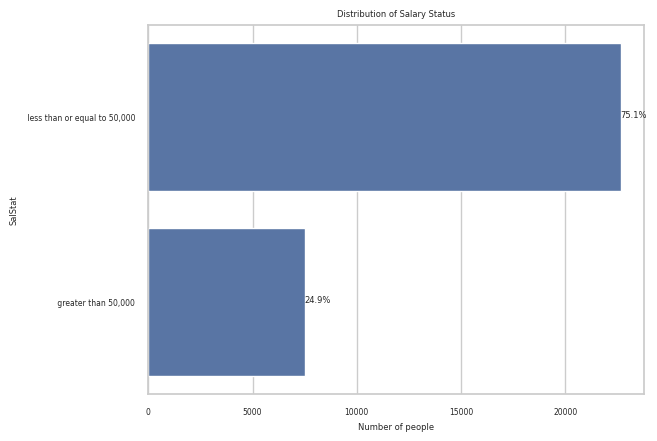

In [84]:
# For classification problem, we need to know te proportion of our output variable.
# Frequency distribution of Salary status
import matplotlib.pyplot as plt
# sns.countplot(data2['SalStat'])
ax = sns.countplot(y='SalStat', data=data2)
plt.title('Distribution of Salary Status')
plt.xlabel('Number of people')

total = len(data2['SalStat'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

<Axes: xlabel='age', ylabel='Count'>

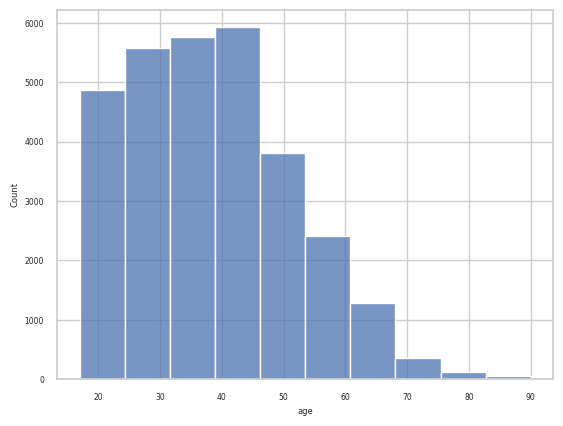

In [85]:
# Histogram of Age
sns.histplot(data2['age'], bins=10, kde=False)

<Axes: xlabel='SalStat', ylabel='age'>

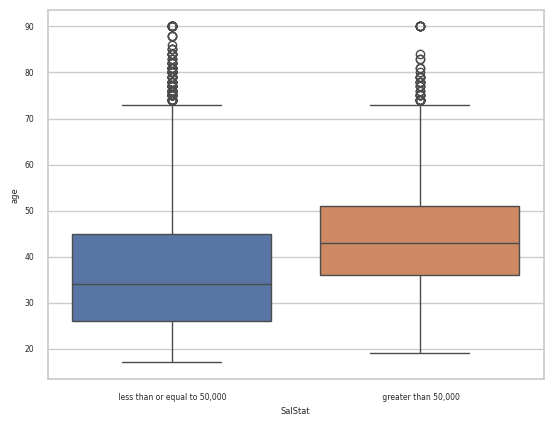

In [86]:
## Boxplot - Age vs Salary Status
# sns.boxplot('SalStat', 'age', data=data2)
sns.boxplot(x='SalStat', y='age', data=data2, hue='SalStat')

<Axes: xlabel='count', ylabel='JobType'>

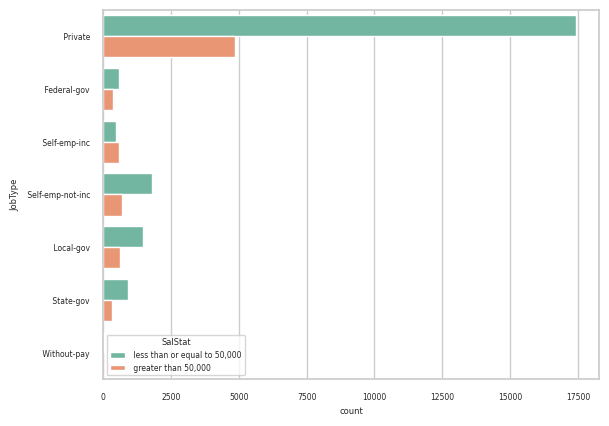

In [87]:
# Visualize Relationship between salstat and jobtype
# sns.FacetGrid(data2, col='SalStat', height=6).map(sns.countplot, 'JobType')
sns.countplot(y='JobType', data=data2, hue='SalStat', palette='Set2') 

In [88]:
# Relationship between JobType and Salary Status 
jobtype_salstat = pd.crosstab(index=data2['JobType'], columns=data2['SalStat'], margins=True, normalize='index')

# Displaying the crosstab as percentage
jobtype_salstat_percentage = jobtype_salstat.apply(lambda r: r*100, axis=1)
jobtype_salstat_percentage

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,38.706257,61.293743
Local-gov,29.462990,70.537010
Private,21.879207,78.120793
Self-emp-inc,55.865922,44.134078
Self-emp-not-inc,28.571429,71.428571
State-gov,26.896013,73.103987
Without-pay,0.000000,100.000000
All,24.892249,75.107751


SalStat        greater than 50,000  less than or equal to 50,000
EdType                                                          
 10th                     7.195122                     92.804878
 11th                     5.629771                     94.370229
 12th                     7.692308                     92.307692
 1st-4th                  3.973510                     96.026490
 5th-6th                  4.166667                     95.833333
 7th-8th                  6.283662                     93.716338
 9th                      5.494505                     94.505495
 Assoc-acdm              25.396825                     74.603175
 Assoc-voc               26.319816                     73.680184
 Bachelors               42.149088                     57.850912
 Doctorate               74.666667                     25.333333
 HS-grad                 16.432927                     83.567073
 Masters                 56.422864                     43.577136
 Preschool               

<Axes: xlabel='count', ylabel='EdType'>

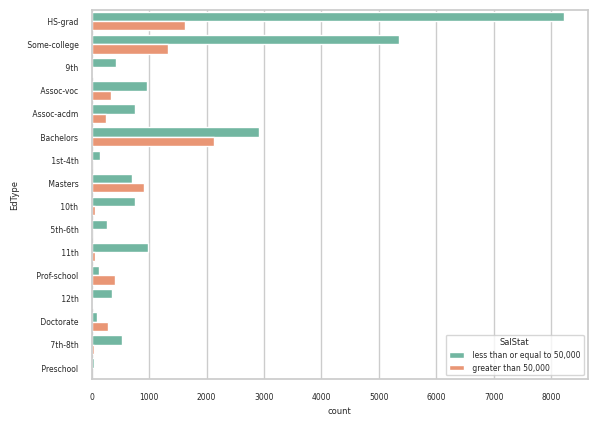

In [89]:
# Relationship between EdType and Salary Status
edtype_salstat = pd.crosstab(index=data2['EdType'], columns=data2['SalStat'], margins=True, normalize='index')

# Displaying the crosstab as percentage
edtype_salstat_percentage = edtype_salstat.apply(lambda r: r*100, axis=1)
print(edtype_salstat_percentage)

# Visualizing the above crosstab
sns.countplot(y='EdType', data=data2, hue='SalStat', palette='Set2')

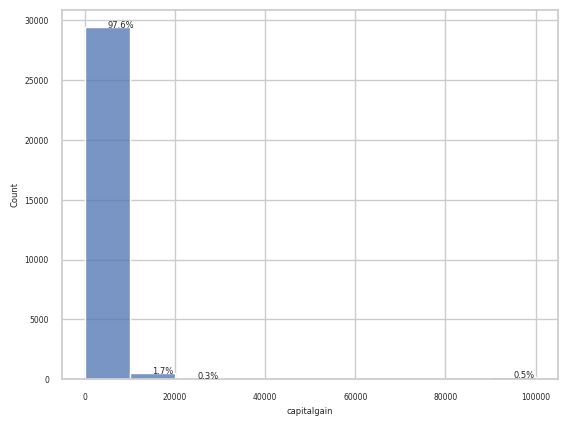

In [90]:
# Captial Gain Frequency Distribution
# Add the percentage to each bar
ax = sns.histplot(data2['capitalgain'], bins=10, kde=False)
total = len(data2['capitalgain'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()
    if percentage != '0.0%':
        ax.annotate(percentage, (x, y))

plt.show()

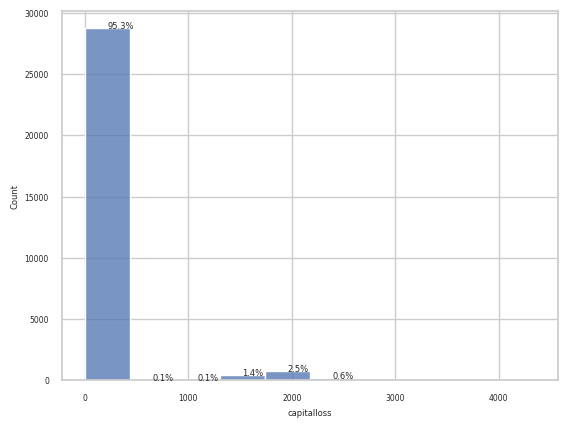

col_0,count
capitalgain,
0,27624
114,6
401,1
594,28
914,8
...,...
25236,11
27828,32
34095,3


In [91]:
# Capital Loss Frequency Distribution
# Add the percentage to each bar
ax = sns.histplot(data2['capitalloss'], bins=10, kde=False)
total = len(data2['capitalloss'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()
    if percentage != '0.0%':
        ax.annotate(percentage, (x, y))

plt.show()


pd.crosstab(index=data2['capitalgain'], columns='count', normalize=False)

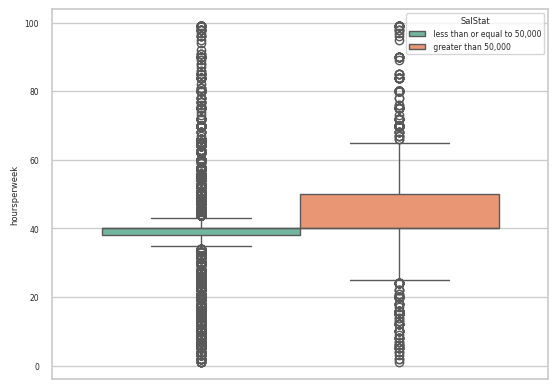

In [92]:
# Hours per week vs Salary Status
sns.set(font_scale=.5)
sns.set_style('whitegrid')
sns.boxplot(y='hoursperweek', data=data2, hue='SalStat', palette='Set2')
plt.show()

## Logistic Regression

In [93]:
# Reindexing the salary status names to 0 and 1
data2['SalStat'] = data2['SalStat'].apply(lambda x: 0 if 'less than or equal to 50,000' in x else 1)
data2['SalStat']

/tmp/ipykernel_55983/2247836952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat'] = data2['SalStat'].apply(lambda x: 0 if 'less than or equal to 50,000' in x else 1)


0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64

In [94]:
# get_dummies uses one-hot encoding to convert categorical variables to numerical
new_data = pd.get_dummies(data2, drop_first=True) # drop_first
new_data

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,24,0,0,40,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,44,0,0,40,1,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,27,0,0,40,0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,20,0,0,35,0,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31974,34,0,0,40,0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31975,23,0,0,40,0,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31976,42,0,0,40,0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [95]:
# Storing the column names
columns_list = list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

In [96]:
# Separating the input names from data
features = list(set(columns_list) - set(['SalStat']))
print(features)

['occupation_ Tech-support', 'nativecountry_ Philippines', 'nativecountry_ Taiwan', 'occupation_ Priv-house-serv', 'maritalstatus_ Married-spouse-absent', 'nativecountry_ Guatemala', 'nativecountry_ Trinadad&Tobago', 'relationship_ Other-relative', 'EdType_ Assoc-acdm', 'hoursperweek', 'nativecountry_ Peru', 'EdType_ Assoc-voc', 'JobType_ Private', 'nativecountry_ France', 'nativecountry_ Yugoslavia', 'capitalloss', 'nativecountry_ Ireland', 'EdType_ 5th-6th', 'occupation_ Transport-moving', 'occupation_ Protective-serv', 'nativecountry_ Columbia', 'nativecountry_ Ecuador', 'EdType_ Prof-school', 'nativecountry_ Thailand', 'occupation_ Craft-repair', 'EdType_ 11th', 'EdType_ Preschool', 'nativecountry_ Portugal', 'gender_ Male', 'nativecountry_ Nicaragua', 'relationship_ Own-child', 'capitalgain', 'nativecountry_ Greece', 'relationship_ Unmarried', 'nativecountry_ Italy', 'nativecountry_ Haiti', 'maritalstatus_ Never-married', 'nativecountry_ Cuba', 'occupation_ Prof-specialty', 'occup

In [97]:
# Storing the output values in y
y = new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [98]:
# Storing the values from input features
x = new_data[features].values
print(x)

[[False False False ... True False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... True False False]]


In [99]:
# Splitting the data into train and test
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=0)

In [100]:
# Make an instance of the model
logistic = LogisticRegression()

In [101]:
logistic.fit(train_x, train_y)

/home/co_nlp_scholar/Documents/code_workspace/Python-getting-started/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [102]:
logistic.coef_

array([[ 1.17556476e-01, -8.29206789e-03,  1.91944898e-03,
        -4.06364792e-02, -5.83608439e-02, -2.17889187e-02,
        -4.49613832e-03, -2.44640103e-01, -5.97838138e-02,
         9.25019271e-03, -1.21033001e-02, -3.86554256e-02,
        -3.20400876e-01,  5.72128481e-03, -5.34223413e-04,
         6.71642711e-04, -3.88595138e-03, -1.40707192e-01,
        -1.95789028e-01, -1.43389017e-02, -2.02431125e-02,
        -7.26007314e-03,  2.34257173e-01, -3.35574605e-03,
        -3.22222102e-01, -3.04728729e-01, -2.64272390e-02,
        -1.37807658e-02,  1.62603789e-01, -1.29145723e-02,
        -9.39613113e-01,  3.13792179e-04, -8.37217678e-03,
        -5.75272104e-01, -1.90522493e-03, -1.18555206e-02,
        -1.34238609e+00, -8.23031642e-03,  6.83899033e-01,
        -1.94495617e-03, -3.91372060e-01, -2.66606999e-02,
         8.97878294e-01, -4.94616305e-04, -7.43515692e-03,
        -2.04392720e-02, -9.34073604e-01, -2.24915901e-03,
        -2.57684028e-02, -3.37852511e-02, -2.25592715e-0

In [103]:
logistic.intercept_

array([-1.04041707])

In [104]:
# Prediction from test data
prediction = logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 0]


In [105]:
# Confusion matrix
confusion_matrix = confusion_matrix(test_y, prediction) 
print(confusion_matrix)

[[6293  530]
 [ 951 1275]]


In [106]:
# Accuracy
accuracy = accuracy_score(test_y, prediction)
print(accuracy)

0.8363355066858217


In [107]:
print('Misclassification Samples : ', (test_y != prediction).sum())   

Misclassification Samples :  1481


## Logistic Regression: Removing Insignificant Variables

In [108]:
data2

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,0
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,0
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,0
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,0


In [109]:
cols = ['gender', 'nativecountry', 'race', 'JobType']
new_data = data2.drop(cols, axis=1)

new_data = pd.get_dummies(new_data, drop_first=True)

In [110]:
columns_list = list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'relationship_ Not-in-family', 'relationship_ Other-rel

In [111]:
features = list(set(columns_list) - set(['SalStat']))
print(features)

['EdType_ Doctorate', 'occupation_ Tech-support', 'EdType_ 12th', 'occupation_ Priv-house-serv', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'EdType_ 1st-4th', 'occupation_ Handlers-cleaners', 'maritalstatus_ Married-civ-spouse', 'relationship_ Other-relative', 'EdType_ Assoc-acdm', 'hoursperweek', 'EdType_ Assoc-voc', 'capitalloss', 'EdType_ 5th-6th', 'occupation_ Transport-moving', 'occupation_ Protective-serv', 'EdType_ Masters', 'EdType_ 7th-8th', 'EdType_ Prof-school', 'relationship_ Wife', 'occupation_ Craft-repair', 'EdType_ 11th', 'EdType_ Preschool', 'capitalgain', 'EdType_ Some-college', 'relationship_ Own-child', 'relationship_ Unmarried', 'age', 'occupation_ Prof-specialty', 'occupation_ Armed-Forces', 'maritalstatus_ Never-married', 'occupation_ Exec-managerial', 'EdType_ Bachelors', 'occupation_ Farming-fishing', 'occupation_ Sales', 'EdType_ HS-grad', 'maritalstatus_ Married-AF-spouse', 'EdType_ 9th', 'occupation_ Other-s

In [112]:
y = new_data['SalStat'].values

In [113]:
x = new_data[features].values

In [114]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=0)

In [115]:
logistic = LogisticRegression()

In [116]:
logistic.fit(train_x, train_y)

/home/co_nlp_scholar/Documents/code_workspace/Python-getting-started/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [117]:
logistic.coef_

array([[ 2.77134451e-01,  8.23271921e-02, -1.03037173e-01,
        -4.69069482e-02, -5.18761733e-02, -1.91681350e-01,
        -9.77766357e-02, -6.78947201e-02, -3.95295702e-01,
         1.00883300e+00, -2.60010076e-01, -8.47576505e-02,
         4.87904418e-03, -8.33497431e-02,  6.49049906e-04,
        -1.34168681e-01, -2.09591605e-01,  3.94848976e-02,
         5.71316831e-01, -2.47492041e-01,  2.68133895e-01,
         3.23897544e-02, -3.76353431e-01, -3.48587840e-01,
        -2.55184529e-02,  3.11506280e-04, -4.97609243e-01,
        -1.07022771e+00, -6.31956441e-01, -2.22370905e-03,
         7.07687613e-01, -1.47179231e-03, -1.53624110e+00,
         8.93332579e-01,  6.38264834e-01, -3.05074099e-01,
         4.43472929e-02, -1.05017269e+00,  1.64347912e-02,
        -1.83997732e-01, -8.11494676e-01, -5.27954662e-01,
        -4.44074770e-01]])

In [118]:
logistic.intercept_

array([-1.38569732])

In [119]:
prediction = logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 0]


In [120]:
accuracy = accuracy_score(test_y, prediction)
accuracy

# Accuracy is not improved by removing the columns

0.8339042988175489

In [122]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [123]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(train_x, train_y)

prediction = knn_classifier.predict(test_x)

In [125]:
accuracy = accuracy_score(test_y, prediction)
accuracy

0.8344568460603382

In [129]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, prediction)
confusion_matrix

array([[6187,  636],
       [ 862, 1364]])

In [130]:
# Misclassification samples
print('Misclassification Samples : ', (test_y != prediction).sum())

Misclassification Samples :  1498


In [131]:
# Effect of k value on classifier
Misclassified_sample = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(test_x)
    Misclassified_sample.append((test_y != pred_i).sum())

print(Misclassified_sample)

[np.int64(1723), np.int64(1512), np.int64(1544), np.int64(1469), np.int64(1498), np.int64(1443), np.int64(1469), np.int64(1456), np.int64(1464), np.int64(1430), np.int64(1476), np.int64(1456), np.int64(1457), np.int64(1451), np.int64(1455), np.int64(1442), np.int64(1436), np.int64(1425), np.int64(1444)]
